This script is written to get atmospheric data (pressure, temperature, etc., as a function of altitude, from a local data file.  The data is then plotted, and fit with a user-defined function

In [19]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = False
fit_type = 2

Define a user funcion for fitting the data.

In [20]:
if fit_type == 1:
    def fitfunction(x,a,b):
        return a*np.exp(b*np.array(x))
else:
    def fitfunction(x,a,b,c):
        return a*np.exp(b*np.array(x)+c*np.power(np.array(x),1.5))

Define python arrays to store the data.

In [21]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

Read data from the filem and store in the above python arrays.

In [22]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4])/10.0)
        viscosity.append(float(data[5]))
        

In [23]:

if use_errors == True:
    # create a list to hold the uncertainty in the density  
    density_uncertainty = [0.01,0.01,0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.00001,0.00001,0.000001,0.0000001,0.0000001]
    density_uncertainty = [density_uncertainty[i]/10.0 for i in range(0,len(density_uncertainty))]
else:
    density_uncertainty = [0.0]*len(density)
    
density_uncertainty = np.array(density_uncertainty)

Text(0, 0.5, 'Density (kg/m^3)')

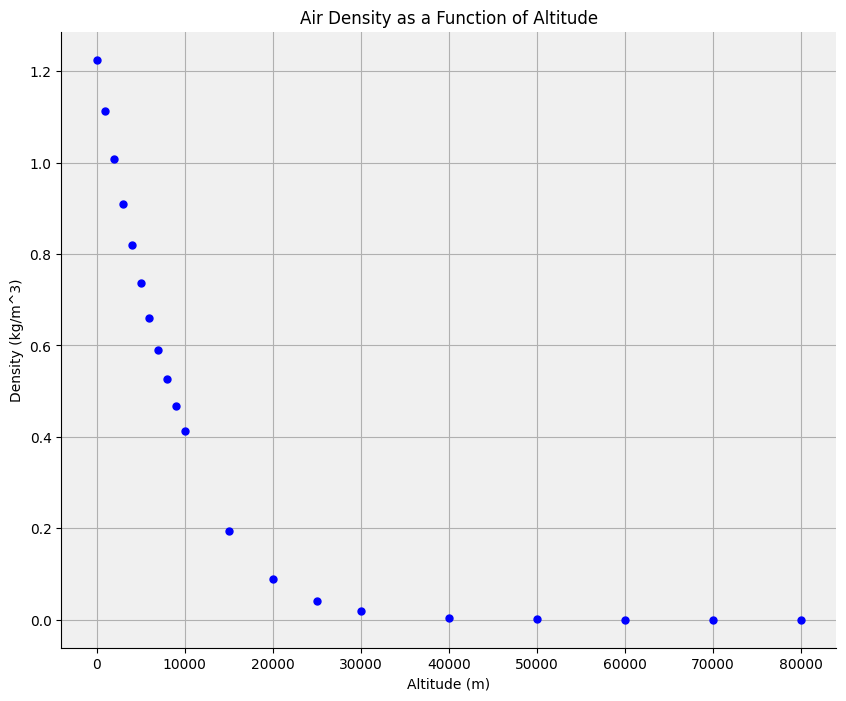

In [24]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(altitude, density, yerr=density_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
#plt.yscale("log")

Fit the data with the pre-defined function

In [25]:
from scipy.optimize import curve_fit

if fit_type == 1:
    init_vals = [1.20,-0.0001]
else:
    init_vals = [1.20,-0.0001, -0.000001]

if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, density, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, density, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[ 1.21440951e+00 -7.36616445e-05 -3.64764691e-07]
[[ 2.96111155e-05 -1.28999969e-08  1.01964258e-10]
 [-1.28999969e-08  1.09584683e-11 -1.02464563e-13]
 [ 1.01964258e-10 -1.02464563e-13  1.02438702e-15]]


In [26]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (density[i]-yfit[i])*(density[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 7.711E-04 / 17


Draw the graph

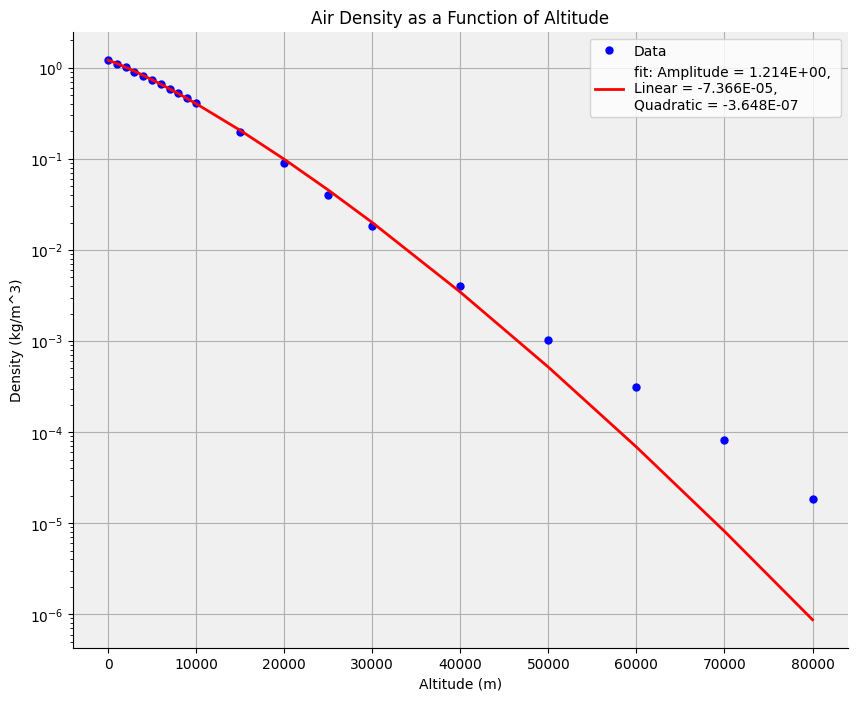

In [27]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E, \nQuadratic = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
plt.yscale("log")
plt.legend()

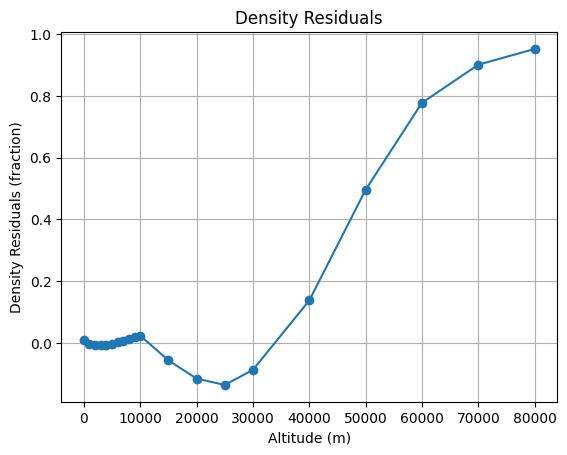

In [28]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (density - fitfunction(altitude, *popt))/density, 'o-')

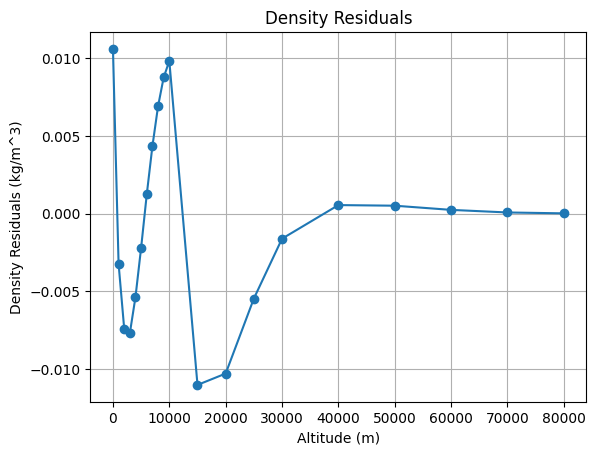

In [29]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (kg/m^3)')
plt.grid(True)

plt.plot(altitude, (density - fitfunction(altitude, *popt)), 'o-')
residuals = (density - fitfunction(altitude, *popt))
popt_exponential = popt

In [30]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g,h):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)


In [31]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

In [32]:
print (popt, pcov)

[ 8.41223324e-04 -1.73844484e-06  5.03180747e-10 -4.81913502e-14
  2.00477419e-18 -4.06870113e-23  3.97542571e-28 -1.49793998e-33] [[ 3.13252108e-05 -1.50516553e-08  2.25057639e-12 -1.47202331e-16
   4.87343497e-21 -8.53750911e-26  7.54307329e-31 -2.64451031e-36]
 [-1.50516553e-08  1.13650386e-11 -2.02996869e-15  1.44859709e-19
  -5.04425388e-24  9.12953961e-29 -8.25057430e-34  2.94062905e-39]
 [ 2.25057639e-12 -2.02996869e-15  3.94685430e-19 -2.94761850e-23
   1.05599568e-27 -1.94878298e-32  1.78620819e-37 -6.43460071e-43]
 [-1.47202331e-16  1.44859709e-19 -2.94761850e-23  2.26587489e-27
  -8.28426970e-32  1.55204433e-36 -1.43911901e-41  5.23160268e-47]
 [ 4.87343497e-21 -5.04425388e-24  1.05599568e-27 -8.28426970e-32
   3.07594848e-36 -5.83244775e-41  5.45985851e-46 -2.00007719e-51]
 [-8.53750911e-26  9.12953961e-29 -1.94878298e-32  1.55204433e-36
  -5.83244775e-41  1.11663908e-45 -1.05349420e-50  3.88385595e-56]
 [ 7.54307329e-31 -8.25057430e-34  1.78620819e-37 -1.43911901e-41
   5.

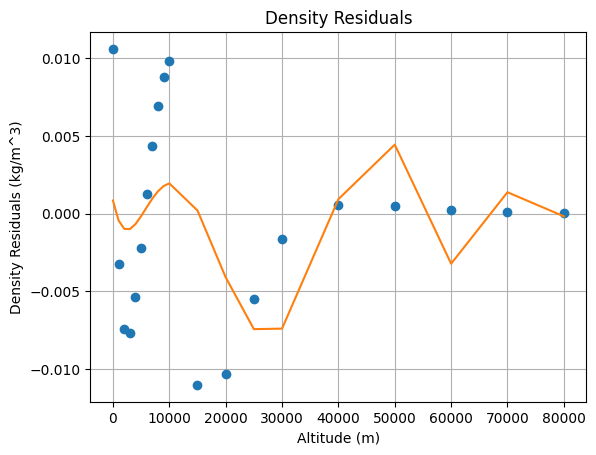

In [33]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (kg/m^3)')
plt.grid(True)


plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [34]:
popt_combined = [popt_exponential[0], popt_exponential[1], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]]

In [35]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g,h):
    return a0*np.exp(a1*np.array(x))+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)

In [36]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, density, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, density, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

In [37]:
print (popt, pcov)

[ 7.55978068e+00 -3.72031864e-06 -6.33795692e+00 -8.49391029e-05
  3.23358404e-09  7.10177587e-15 -2.37461299e-18  5.26715397e-23
 -4.86189174e-28  1.68370747e-33] [[ 1.27226250e+11  8.22555231e+03 -1.27226250e+11  4.11354643e+05
  -6.49853190e-01  6.66685568e-07 -6.51172270e-13  3.72601307e-18
  -3.48746373e-23  1.35040784e-28]
 [ 8.22555231e+03  2.91649587e-02 -8.22555235e+03 -1.89863369e-01
   7.63664764e-07 -1.45810187e-12  1.90538545e-18 -3.50598658e-24
   2.12775976e-29 -8.54397620e-35]
 [-1.27226250e+11 -8.22555235e+03  1.27226250e+11 -4.11354643e+05
   6.49853191e-01 -6.66685569e-07  6.51172272e-13 -3.72601311e-18
   3.48746377e-23 -1.35040785e-28]
 [ 4.11354643e+05 -1.89863369e-01 -4.11354643e+05  2.96638080e+00
  -8.19185384e-06  1.35042554e-11 -1.68278558e-17  4.03725793e-23
  -2.90656816e-28  1.14852523e-33]
 [-6.49853190e-01  7.63664764e-07  6.49853191e-01 -8.19185384e-06
   2.59895721e-11 -4.56462545e-17  5.81248471e-23 -1.24469142e-28
   8.40355334e-34 -3.33978312e-39]
 

Chi^2 / dof = 1.886E-04 / 10


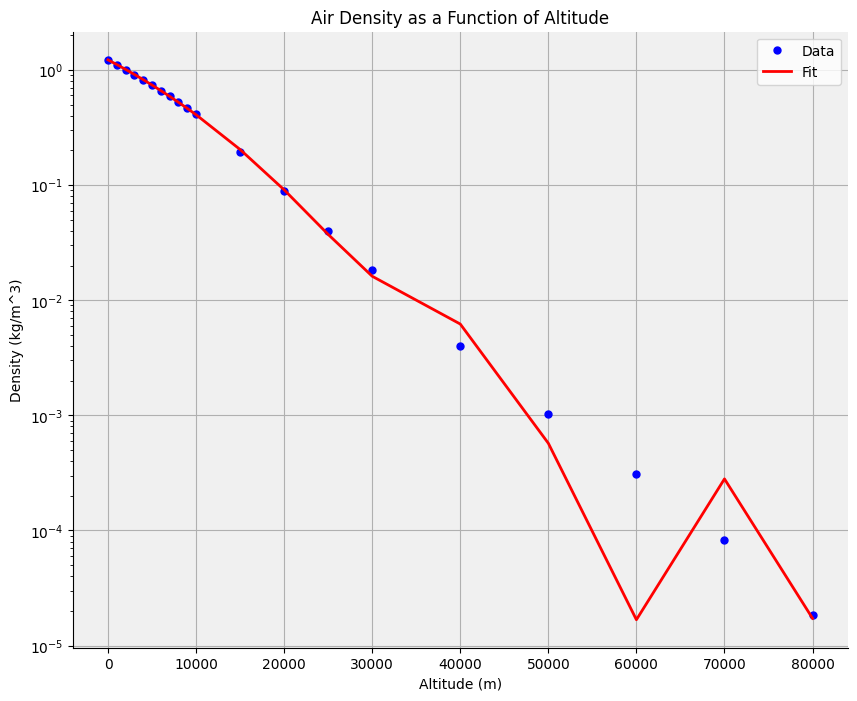

In [39]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction_combined(altitude[i],*popt))
    chi2 += (density[i]-yfit[i])*(density[i]-yfit[i])
    
print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,np.abs(yfit),color='r', linewidth=2, label = "Fit")

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
plt.yscale("log")
plt.legend()